# Matplotlib

## Por que o Matplotlib pode ser confuso?
Aprender o matplotlib pode ser um processo frustrante às vezes. O problema não é que a documentação do matplotlib está faltando: a documentação é realmente extensa. Mas os seguintes problemas podem causar alguns desafios:

- A biblioteca em si é enorme, com algo como 70.000 linhas de código.
- O Matplotlib é o lar de várias interfaces diferentes (formas de construir uma figura) e capazes de interagir com um punhado de diferentes backends. (Os backends lidam com o processo de como os gráficos são realmente renderizados, e não apenas estruturados internamente.)
- Embora seja abrangente, algumas das próprias documentações públicas do matplotlib estão seriamente desatualizadas . A biblioteca ainda está evoluindo, e muitos exemplos mais antigos circulando on-line podem ter 70% menos linhas de código em sua versão moderna.
Portanto, antes de chegarmos a exemplos chamativos, é útil entender os conceitos centrais do design do matplotlib.


## Pylab: O que é e eu devo usá-lo?
Vamos começar com um pouco da história: John D. Hunter, um neurobiólogo, começou a desenvolver o matplotlib por volta de 2003, originalmente inspirado a emular comandos do software MATLAB da Mathworks. John faleceu tragicamente jovem aos 44 anos, em 2012, e o matplotlib é agora um esforço comunitário de pleno direito, desenvolvido e mantido por uma série de outros. (John fez uma palestra sobre a evolução do matplotlib na conferência SciPy de 2012, que vale a pena assistir.)

Uma característica relevante do MATLAB é seu estilo global. O conceito de importação do Python não é muito usado no MATLAB, e a maioria das funções do MATLAB está prontamente disponível para o usuário no nível superior.

Saber que o matplotlib tem suas raízes no MATLAB ajuda a explicar por que o pylab existe. pylab é um módulo dentro da biblioteca matplotlib que foi construída para imitar o estilo global do MATLAB. Ele existe apenas para trazer diversas funções e classes do NumPy e do matplotlib para o namespace , facilitando a transição para antigos usuários do MATLAB que não estavam acostumados a precisar de importinstruções.

Ex-MATLAB convertidos (que são todos ótimos, eu prometo!) Gostaram dessa funcionalidade, porque com from pylab import *, eles poderiam simplesmente ligar plot()ou array()diretamente, como fariam no MATLAB.

A questão aqui pode ser aparente para alguns usuários do Python: usar from pylab import *em uma sessão ou script geralmente é uma prática ruim. O Matplotlib agora avisa diretamente contra isso em seus próprios tutoriais:

    “[Pylab] ainda existe por razões históricas, mas é altamente recomendado não usar. Ele polui namespaces com funções que irão sombrear os componentes internos do Python e podem levar a erros difíceis de rastrear. Para obter a integração do IPython sem importações, o uso da %matplotlibmagia é o preferido. ”[ Source ]

Internamente, há uma tonelada de importações potencialmente conflitantes sendo mascaradas dentro da curta fonte pylab . De fato, usando ipython --pylab(do terminal / linha de comando) ou %pylab(de ferramentas IPython / Jupyter) simplesmente chama from pylab import *sob o capô.

O ponto principal é que o **matplotlib abandonou este módulo de conveniência e agora recomenda explicitamente que não use o pylab**, alinhando as coisas com uma das principais noções do Python: explícito é melhor que implícito.

Sem a necessidade de pylab, normalmente podemos nos safar com apenas uma importação canônica:




In [2]:
import matplotlib.pyplot as plt

Enquanto estamos nisso, vamos também importar o NumPy, que usaremos para gerar dados mais tarde, e ligar np.random.seed()para fazer exemplos com (pseudo) dados aleatórios reproduzíveis:

In [3]:
import  numpy  as  np 
np.random.seed(42)

## A hierarquia de objetos do Matplotlib

Um conceito importante de grande figura é sua hierarquia de objetos.

Se você já trabalhou em qualquer tutorial introdutório de matplotlib, provavelmente já chamou algo assim plt.plot([1, 2, 3]). Este one-liner esconde o fato de que uma plotagem é realmente uma hierarquia de objetos Python aninhados. Uma "hierarquia" aqui significa que existe uma estrutura em árvore dos objetos matplotlib subjacentes a cada parcela.

Um Figureobjeto é o contêiner mais externo de um gráfico matplotlib, que pode conter vários Axesobjetos. Uma fonte de confusão é o nome: Axesna verdade, traduz-se no que pensamos como um gráfico ou gráfico individual (em vez do plural de "eixo", como poderíamos esperar).

Você pode pensar no Figureobjeto como um contêiner tipo caixa contendo um ou mais Axes(gráficos reais). Abaixo da Axeshierarquia, há objetos menores, como marcas de escala, linhas individuais, legendas e caixas de texto. Quase todo "elemento" de um gráfico é seu próprio objeto manipulável em Python, até os marcadores e marcas:

<img src='https://files.realpython.com/media/fig_map.bc8c7cabd823.png'>

Aqui está uma ilustração dessa hierarquia em ação. Não se preocupe se você não estiver completamente familiarizado com essa notação, que abordaremos mais adiante:


matplotlib.figure.Figure

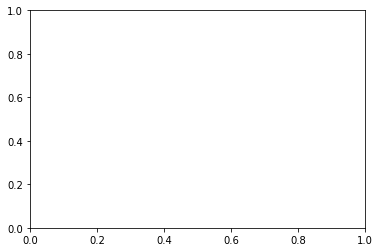

In [6]:
fig, _ = plt.subplots()
type(fig)

Acima, criamos duas variáveis ​​com plt.subplots(). O primeiro é um Figureobjeto de nível superior . A segunda é uma variável “descartável” que não precisamos ainda, denotada com um sublinhado. Usando a notação de atributo, é fácil percorrer a hierarquia das figuras e ver o primeiro tique do eixo y do primeiro objeto Axes:



In [9]:
one_tick = fig.axes[0].yaxis.get_major_ticks()[0]
type(one_tick)

matplotlib.axis.YTick

Acima, fig(uma Figureinstância de classe) tem múltiplos Axes(uma lista, para a qual tomamos o primeiro elemento). Cada Axesum tem um yaxise xaxiscada um deles tem uma coleção de “ticks principais” e nós pegamos o primeiro.
O Matplotlib apresenta isso como uma anatomia de figura, em vez de uma hierarquia explícita:

<img src='https://files.realpython.com/media/anatomy.7d033ebbfbc8.png'>
(No verdadeiro estilo matplotlib, a figura acima é criada nos documentos do matplotlib aqui .)

## Abordagens Stateful Versus Stateless

Certo, precisamos de mais uma parte da teoria antes de podermos dar uma olhada nas visualizações brilhantes: a diferença entre as interfaces stateful (state-based, state-machine) e stateless ( orientada a objeto , OO).

Acima, usamos import matplotlib.pyplot as pltpara importar o módulo pyplot do matplotlib e nomeá-lo plt.

Quase todas as funções do pyplot, como plt.plot(), implicitamente, estão se referindo a uma figura existente atual e aos eixos atuais, ou criando-as de novo, se nenhuma existir. Oculto nos documentos do matplotlib está este trecho útil:

    “[Com o pyplot], funções simples são usadas para adicionar elementos de plotagem (linhas, imagens, texto, etc.) aos eixos atuais na figura atual .”

Os ex-usuários do MATLAB podem escolher dizer isso, dizendo algo como “ plt.plot()é uma interface de máquina de estado que rastreia implicitamente a figura atual!” Em inglês, isso significa que:

- A interface stateful faz suas chamadas com plt.plot()e outras funções pyplot de nível superior. Existe apenas uma Figura ou Machados que você está manipulando em um determinado momento, e você não precisa se referir explicitamente a ela.
- Modificar os objetos subjacentes diretamente é a abordagem orientada a objetos. Geralmente fazemos isso chamando métodos de um Axesobjeto, que é o objeto que representa um gráfico em si.
O fluxo desse processo, em um nível alto, é assim:

<img src='https://files.realpython.com/media/flow.a210eb81a42b.jpg'>

Juntando tudo isso, a maioria das funções do pyplot também existem como métodos da matplotlib.axes.Axesclasse.

Isto é mais fácil de ver, sob o capô. plt.plot()pode ser resumido em cinco ou mais linhas de código:

In [10]:
def plot(*args, **kwargs):
    """An abridged version of plt.plot()."""
    ax = plt.gca()
    return ax.plot(*args, **kwargs)

def gca(**kwargs):
    """Get the current Axes of the current Figure."""
    return plt.gcf().gca(**kwargs)

A chamada plt.plot()é apenas uma maneira conveniente de obter os eixos atuais da figura atual e depois chamar seu plot()método. É isso que significa a afirmação de que a interface com estado sempre “rastreia implicitamente” o enredo que deseja referenciar.

O pyplot é o lar de um lote de funções que são realmente apenas wrappers em torno da interface orientada a objetos do matplotlib. Por exemplo, com plt.title(), existem métodos setter e getter correspondentes dentro da abordagem OO ax.set_title()e ax.get_title(). (O uso de getters e setters tende a ser mais popular em linguagens como Java, mas é uma característica chave da abordagem OO do matplotlib.)

Vocação plt.title()é traduzido para esta linha: gca().set_title(s, *args, **kwargs). Veja o que isso está fazendo:

- gca() pega o eixo atual e o retorna.
- set_title()é um método setter que define o título para esse objeto Axes. A "conveniência" aqui é que não precisamos especificar explicitamente nenhum objeto Axes plt.title().

Da mesma forma, se você tomar alguns momentos para olhar para a fonte para as funções de nível superior, como plt.grid(), plt.legend(), e plt.ylabels(), você vai perceber que todas elas seguem a mesma estrutura de delegar à corrente eixos com gca()e, em seguida, chamando algum método da corrente Eixos. (Esta é a abordagem subjacente orientada a objetos!)

## Noções plt.subplots()básicas sobre notação
Tudo bem, teoria suficiente. Agora, estamos prontos para juntar tudo e fazer algumas plotagens. De agora em diante, vamos nos basear principalmente na abordagem sem estado (orientada a objetos), que é mais personalizável e vem a calhar à medida que os gráficos se tornam mais complexos.

A maneira prescrita para criar uma figura com um único eixo sob a abordagem OO é (não muito intuitivamente) com plt.subplots(). Esta é realmente a única vez que a abordagem OO usa pyplot, para criar uma figura e machados:

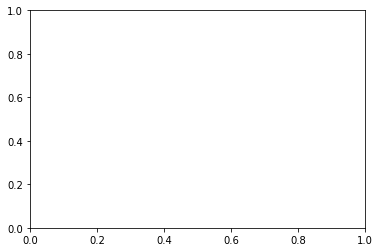

In [12]:
fig, ax = plt.subplots()

Acima, aproveitamos a descompactação iterável para atribuir uma variável separada a cada um dos dois resultados plt.subplots(). Observe que não passamos argumentos para subplots()aqui. A chamada padrão é subplots(nrows=1, ncols=1). Consequentemente, axé um único AxesSubplotobjeto:

In [13]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

Podemos chamar seus métodos de instância para manipular o enredo de forma semelhante ao modo como chamamos as funções dos picos. Vamos ilustrar com um gráfico de área empilhada de três séries temporais:

In [ ]:
fig.figure()

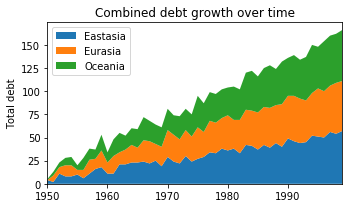

In [19]:
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

fig, ax = plt.subplots(figsize=(5, 3))
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()

Aqui está o que está acontecendo acima:

- Depois de criar três séries temporais aleatórias, definimos uma figura ( fig) contendo um eixo (um gráfico ax).

- Chamamos métodos de axdiretamente para criar um gráfico de áreas empilhadas e adicionar um rótulo de legenda, título e eixo y. Sob a abordagem orientada a objetos, está claro que todos esses são atributos de ax.

- tight_layout() aplica-se ao objeto Figura como um todo para limpar o preenchimento de espaço em branco.

Vejamos um exemplo com várias subparcelas (Axes) dentro de uma figura, plotando duas matrizes correlacionadas que são extraídas da distribuição uniforme discreta :


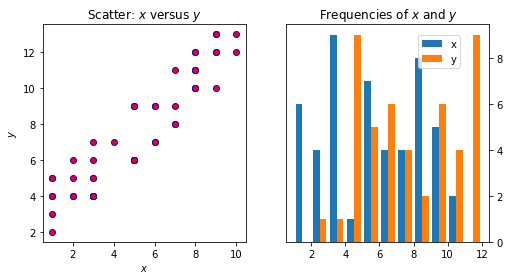

In [20]:
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                               figsize=(8, 4))

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.hist(data, bins=np.arange(data.min(), data.max()),
         label=('x', 'y'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

Há um pouco mais acontecendo neste exemplo:

- Como estamos criando uma figura "1x2", o resultado retornado plt.subplots(1, 2)agora é um objeto Figure e uma matriz NumPy de objetos Axes. (Você pode inspecionar isso fig, axs = plt.subplots(1, 2)e dar uma olhada axs.)

- Nós lidamos com ax1e ax2individualmente, o que seria difícil de fazer com a abordagem stateful. A linha final é uma boa ilustração da hierarquia de objetos, onde estamos modificando a yaxispertença aos segundos Eixos, colocando seus carrapatos e ticks para a direita.

- Texto dentro de cifrões utiliza marcação de TeX para colocar variáveis ​​em itálico.

Lembre-se que múltiplos Eixos podem ser incluídos ou “pertencer” a uma determinada figura. No caso acima, fig.axesobtém-nos uma lista de todos os objetos Axes:

In [21]:
(fig.axes[0] is ax1, fig.axes[1] is ax2)

(True, True)

( fig.axes é minúscula, não maiúscula. Não há como negar que a terminologia é um pouco confusa.)

Levando isso um passo adiante, poderíamos alternativamente criar uma figura que contenha uma grade de Axesobjetos 2x2 :

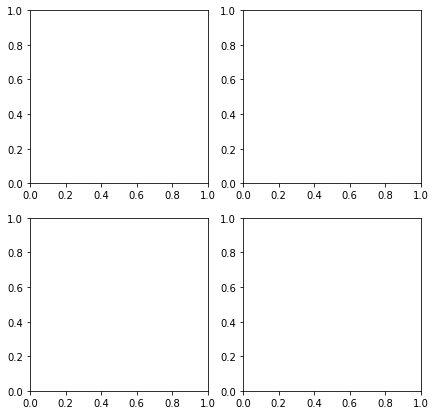

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))

Agora o que é ax? Não é mais um único Axes, mas um array NumPy bidimensional deles:



In [25]:
print(ax.shape)

print(ax)

(2, 2)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022AA3BC3BA8>


Isto é reafirmado pelo docstring:

    "Pode ser um único matplotlib.axes.Axes objeto ou uma matriz de Axes objetos se mais de uma subplot foi criada."

Agora precisamos chamar métodos de plotagem em cada um deles Axes(mas não na matriz NumPy, que é apenas um contêiner nesse caso). Uma maneira comum de resolver isso é usar a descompactação iterável após achatar a matriz para ser unidimensional:

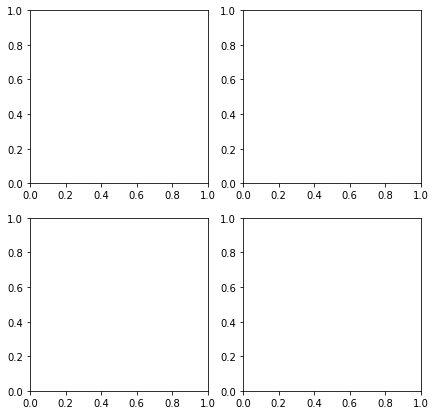

In [26]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
ax1, ax2, ax3, ax4 = ax.flatten()  # flatten a 2d NumPy array to 1d

Também poderíamos ter feito isso ((ax1, ax2), (ax3, ax4)) = ax, mas a primeira abordagem tende a ser mais flexível.

Para ilustrar algumas funções mais avançadas subtratamentos, vamos puxar alguns dados de habitação Califórnia macroeconômicas extraídos de um arquivo tar comprimido, utilizando io, tarfilee urllibda biblioteca padrão do Python.

In [34]:
from io import BytesIO
import tarfile
from urllib.request import urlopen

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

A variável “resposta” yabaixo, para usar o termo estatístico, é o valor médio de uma casa na área. pope agesão a população da área e a idade média da casa, respectivamente:



In [35]:
y = housing[:, -1]
pop, age = housing[:, [4, 7]].T

Em seguida, vamos definir uma “função auxiliar” que insere uma caixa de texto dentro de uma plotagem e age como um “título in-plot”:

In [36]:
def add_titlebox(ax, text):
    ax.text(.55, .8, text,
        horizontalalignment='center',
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.6),
        fontsize=12.5)
    return ax

Estamos prontos para fazer algumas plotagens. O gridspecmódulo do Matplotlib permite mais customização de subtramas. O pyplot subplot2grid()interage bem com este módulo. Digamos que queremos criar um layout como este:

<img src='https://files.realpython.com/media/empty_gridspec.d4fc1c219152.png'>

Acima, o que realmente temos é uma grade de 3x2. ax1é o dobro da altura e largura de ax2/ ax3, o que significa que ocupa duas colunas e duas linhas.

<img src='https://files.realpython.com/media/empty_gridspec_annot.782349dc90a1.png'>

O segundo argumento para subplot2grid()é o local (linha, coluna) dos Eixos dentro da grade:


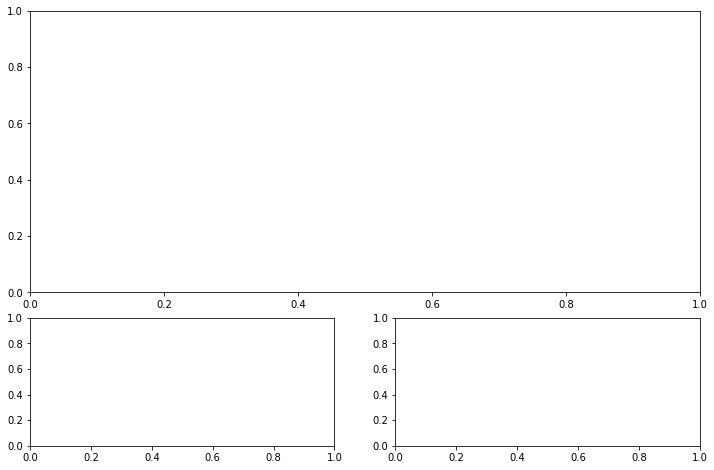

In [37]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

Agora, podemos proceder normalmente, modificando cada Eixo individualmente:

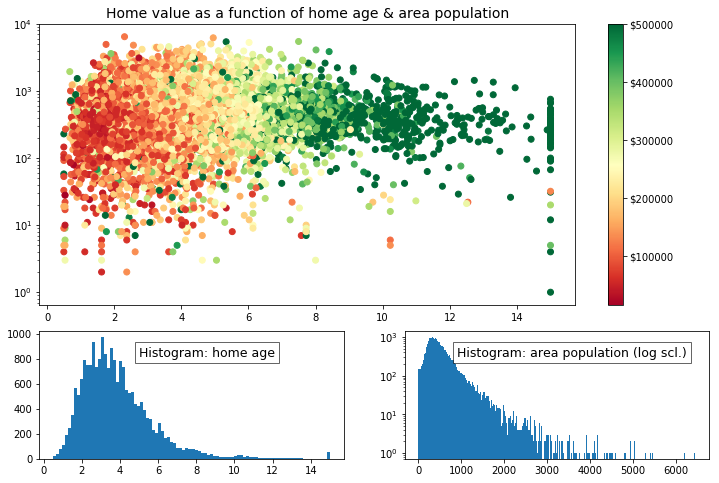

In [39]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

ax1.set_title('Home value as a function of home age & area population',
              fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')

Acima, colorbar()(diferente do ColorMap anterior) é chamado diretamente na figura, em vez dos eixos. Seu primeiro argumento usa o Matplotlib's .scatter()e é o resultado de ax1.scatter(), que funciona como um mapeamento de valores y para um ColorMap.

Visualmente, não há muita diferenciação na cor (a variável y) à medida que nos movemos para cima e para baixo no eixo y, indicando que a idade familiar parece ser um determinante mais forte do valor da casa.

## As “figs” nos bastidores

Cada vez que você chama plt.subplots()ou o menos freqüentemente usado plt.figure()(o que cria uma figura, sem eixos), você está criando um novo objeto de figura que o matplotlib mantém na memória. Anteriormente, aludimos ao conceito de uma figura atual e dos eixos atuais. Por padrão, estas são as Figuras e Eixos criados mais recentemente, que podemos mostrar com a função id()interna para exibir o endereço do objeto na memória:

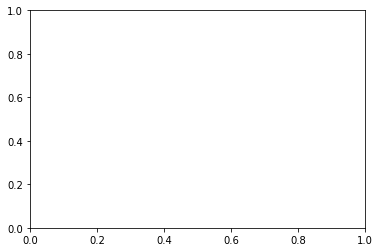

In [40]:
fig1, ax1 = plt.subplots()

In [41]:
id(fig1)

2382134092296

In [42]:
id(plt.gcf())  # `fig1` is the current figure.

2382195506368

<Figure size 432x288 with 0 Axes>

True

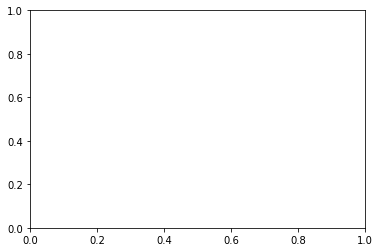

In [43]:
fig2, ax2 = plt.subplots()
id(fig2) == id(plt.gcf())  # The current figure has changed to `fig2`.

(Também podemos usar o isoperador interno aqui.)

Após a rotina acima, o número atual é fig2, a figura criada mais recentemente. No entanto, os dois números ainda estão circulando na memória, cada um com um número de ID correspondente (1 indexado, no estilo MATLAB):

In [44]:
plt.get_fignums()

[]

Uma maneira útil de obter todas as figuras é com um mapeamento plt.figure()para cada um desses números inteiros:

In [46]:
def get_all_figures():
    return [plt.figure(i) for i in plt.get_fignums()]

get_all_figures()

[]

Esteja ciente disso ao executar um script no qual você está criando um grupo de figuras. Você vai querer explicitamente fechar cada um deles após o uso para evitar a MemoryError. Por si só, plt.close()fecha a figura atual, plt.close(num)fecha o número da figura nume plt.close('all')fecha todas as janelas de figura:

In [47]:
plt.close('all')
get_all_figures()

[]

## Uma explosão de cores: imshow() e matshow()

Embora ax.plot()seja um dos métodos de plotagem mais comuns em um Axes, há também uma série de outros. (Nós usamos ax.stackplot()acima. Você pode encontrar a lista completa [aqui](https://matplotlib.org/api/axes_api.html?highlight=axes%20class#plotting))

Os métodos que usam muito são imshow()e matshow(), com o último sendo um wrapper em torno do primeiro. Eles são úteis sempre que um array numérico bruto pode ser visualizado como uma grade colorida.

Primeiro, vamos criar duas grades distintas com alguma indexação fantasia do NumPy:

In [50]:
x = np.diag(np.arange(2, 12))[::-1]
x[np.diag_indices_from(x[::-1])] = np.arange(2, 12)
x2 = np.arange(x.size).reshape(x.shape)

Em seguida, podemos mapear isso para suas representações de imagem. Neste caso específico, alternamos “off” todos os rótulos e carrapatos do eixo usando uma compreensão do dicionário e passando o resultado para ax.tick_params():

In [51]:
sides = ('left', 'right', 'top', 'bottom')
nolabels = {s: False for s in sides}
nolabels.update({'label%s' % s: False for s in sides})
print(nolabels)

{'left': False, 'right': False, 'top': False, 'bottom': False, 'labelleft': False, 'labelright': False, 'labeltop': False, 'labelbottom': False}


Em seguida, podemos usar um [gerenciador de contexto](https://docs.python.org/3/reference/datamodel.html#context-managers) para desativar a grade e chamar matshow()cada Eixo. Por fim, precisamos colocar a barra de cores no que é tecnicamente um novo eixo dentro fig. Para isso, podemos usar um pouco de uma função esotérica de dentro do matplotlib:

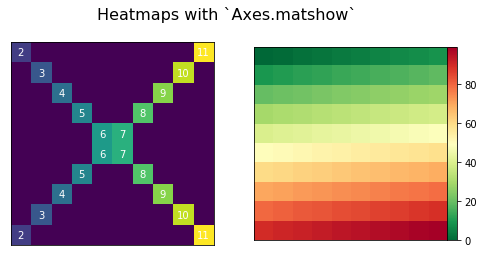

In [52]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

with plt.rc_context(rc={'axes.grid': False}):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    ax1.matshow(x)
    img2 = ax2.matshow(x2, cmap='RdYlGn_r')
    for ax in (ax1, ax2):
        ax.tick_params(axis='both', which='both', **nolabels)
    for i, j in zip(*x.nonzero()):
        ax1.text(j, i, x[i, j], color='white', ha='center', va='center')

    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size='5%', pad=0)
    plt.colorbar(img2, cax=cax, ax=[ax1, ax2])
    fig.suptitle('Heatmaps with `Axes.matshow`', fontsize=16)

## Plotar em pandas
A biblioteca de pandas tornou-se popular não apenas por possibilitar uma poderosa análise de dados , mas também por seus úteis métodos de plotagem pré-enlatados. Curiosamente, no entanto, os métodos de plotagem de pandas são apenas invólucros convenientes em torno de chamadas existentes no matplotlib.

Ou seja, o plot()método da série e do DataFrame dos pandas é um wrapper plt.plot(). Uma conveniência fornecida, por exemplo, é que se o índice do DataFrame consistir em datas, gcf().autofmt_xdate()é chamado internamente pelos pandas para obter a figura atual e formatar automaticamente o eixo x.

Por sua vez, lembre-se de que plt.plot()(a abordagem baseada no estado) está implicitamente ciente da figura atual e dos eixos atuais, de modo que os pandas estão seguindo a abordagem baseada no estado por extensão.

Podemos provar essa “cadeia” de chamadas de função com um pouco de introspecção. Primeiro, vamos construir uma série de pandas simples, assumindo que estamos começando uma nova sessão de intérprete:



True

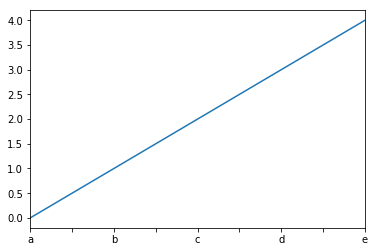

In [53]:
import pandas as pd

s = pd.Series(np.arange(5), index=list('abcde'))
ax = s.plot()

type(ax)


id(plt.gca()) == id(ax)

Essa arquitetura interna é útil para saber quando você está misturando métodos de plotagem de pandas com chamadas de matplotlib tradicionais, o que é feito abaixo para representar a média móvel de uma série temporal amplamente assistida. maé uma série de pandas para a qual podemos chamar ma.plot()(o método pandas) e, em seguida, personalizar recuperando os Eixos que são criados por essa chamada ( plt.gca()), para que o matplotlib faça referência:

C:\Users\marco\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
C:\Users\marco\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


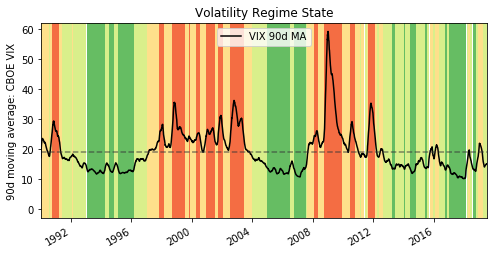

In [54]:
import pandas as pd
import matplotlib.transforms as mtransforms

url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=VIXCLS'
vix = pd.read_csv(url, index_col=0, parse_dates=True, na_values='.',
                  infer_datetime_format=True,
                  squeeze=True).dropna()
ma = vix.rolling('90d').mean()
state = pd.cut(ma, bins=[-np.inf, 14, 18, 24, np.inf],
               labels=range(4))

cmap = plt.get_cmap('RdYlGn_r')
ma.plot(color='black', linewidth=1.5, marker='', figsize=(8, 4),
        label='VIX 90d MA')
ax = plt.gca()  # Get the current Axes that ma.plot() references
ax.set_xlabel('')
ax.set_ylabel('90d moving average: CBOE VIX')
ax.set_title('Volatility Regime State')
ax.grid(False)
ax.legend(loc='upper center')
ax.set_xlim(xmin=ma.index[0], xmax=ma.index[-1])

trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
for i, color in enumerate(cmap([0.2, 0.4, 0.6, 0.8])):
    ax.fill_between(ma.index, 0, 1, where=state==i,
                    facecolor=color, transform=trans)
ax.axhline(vix.mean(), linestyle='dashed', color='xkcd:dark grey',
           alpha=0.6, label='Full-period mean', marker='')

Há muita coisa acontecendo acima:

- ma é uma média móvel de 90 dias do Índice VIX, uma medida das expectativas do mercado quanto à volatilidade das ações no curto prazo. stateé um binning da média móvel em diferentes estados de regime. Um VIX alto é visto como sinalizando um nível elevado de medo no mercado.

- cmap é um ColorMap - um objeto matplotlib que é essencialmente um mapeamento de floats para cores RGBA. Qualquer mapa de cores pode ser revertido anexando '_r', assim 'RdYlGn_r'como o mapa de cores invertido Vermelho-Amarelo-Verde. O Matplotlib mantém um guia de referência visual útil para ColorMaps em seus documentos.

- A única chamada de pandas real que estamos fazendo aqui é ma.plot(). Isso chama plt.plot()internamente, então, para integrar a abordagem orientada a objeto, precisamos obter uma referência explícita aos eixos atuais com ax = plt.gca().

- O segundo bloco de código cria blocos preenchidos com cor que correspondem a cada caixa de state. cmap([0.2, 0.4, 0.6, 0.8])diz: “Obtenha uma sequência RGBA para as cores nos percentis 20, 40, 60 e 80 'ao longo do espectro do ColorMaps.” enumerate()é usada porque queremos mapear cada cor RGBA de volta a um estado.

Os pandas também são desenvolvidos com um punhado de gráficos mais avançados (que podem ocupar todo um tutorial por conta própria). No entanto, todas elas, assim como suas contrapartes mais simples, dependem de maquinário de matplotlib internamente.

## Wrapping Up

Como mostrado por alguns dos exemplos acima, não há como evitar o fato de que o matplotlib pode ser uma biblioteca técnica com muita sintaxe. Criar um gráfico pronto para produção às vezes requer meia hora pesquisando e combinando uma miscelânea de linhas para afinar um gráfico.

No entanto, entender como as interfaces do matplotlib interagem é um investimento que pode ser compensado. Como o próprio Dan Bader do Real Python aconselhou, dedicar um tempo para dissecar o código em vez de recorrer à solução “copiar massas” do Stack Overflow tende a ser uma solução de longo prazo mais inteligente. Aderir à abordagem orientada a objetos pode economizar horas de frustração quando você quiser fazer um gráfico da planície para uma obra de arte.

fonte: Brad Solomon em https://realpython.com/python-matplotlib-guide/